In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
opts = {"with_labels": True, "node_color":'g'}

In [2]:
#Matriz de acoplamiento
def matriz_acoplaminento(G):
    ma = np.zeros([len(G),len(G)])
    for nodo in G:
        for i in range(0,len(G)):
            if nodo != i:
                if G.has_edge(nodo,i):
                    ma[nodo,i] = 1
                else:
                    ma[nodo,i] = 0
            else:
                ma[nodo,i] = -(nx.degree(G,nodo))
                #ma[nodo,i] = -1
    return ma 

[[-4.  1.  1. ...  0.  1.  1.]
 [ 1. -6.  1. ...  0.  0.  1.]
 [ 1.  1. -5. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -5.  1.  1.]
 [ 1.  0.  0. ...  1. -6.  1.]
 [ 1.  1.  0. ...  1.  1. -4.]]
El coeficiente de agrupamiento es: 0.3475238095238095
El promedio del camino mas corto es: 2.9224489795918367


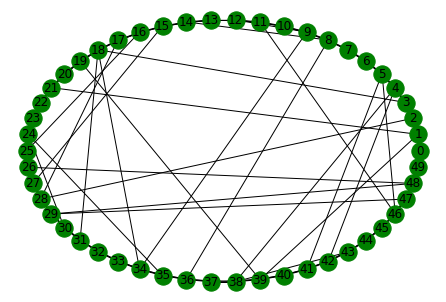

In [3]:
n, k = 50, 2
p = 0.2
G = nx.newman_watts_strogatz_graph(n,2*k,p)
clustering = nx.algorithms.average_clustering(G)
shorestPath = nx.average_shortest_path_length(G)
ma = matriz_acoplaminento(G)
print(ma)
print("El coeficiente de agrupamiento es:",clustering)
print("El promedio del camino mas corto es:",shorestPath)

nx.draw_circular(G,**opts)
plt.show()

In [11]:
#Calculo de los valores propios de la matriz de acoplamiento
vp = np.linalg.eigvals(ma)
vp = sorted(vp,reverse=True)
print("Los valores propios son:")
print(vp)
print("El valor propio Lamda2 es:")
print(vp[1])

Los valores propios son:
[-1.1102230246251565e-15, -0.6191648478076822, -0.683641211025084, -1.036843156469418, -1.154311485395737, -1.4496986481885228, -1.7271912108028342, -1.8536366183269062, -1.9959167159103404, -2.4709696569064112, -2.821772409843717, -3.071831164325933, -3.3618642053165844, -3.7663393466579778, -3.8765672193821716, -4.236915075830729, -4.422637123325364, -4.455005820265613, -4.5926684424725295, -4.686480272273592, -4.800341157195184, -4.814136797390523, -4.848319809343416, -4.985833398753588, -5.082085992707742, -5.260808827755274, -5.40408575360393, -5.552292843785548, -5.6812850218994555, -5.765891840404105, -5.8321244935912135, -5.907671743425842, -6.070055112066884, -6.1834260930558695, -6.4058135000382395, -6.4333403084156, -6.567417013189685, -6.83938602376843, -6.954853773282241, -7.102904988646037, -7.174806191834204, -7.4946718213449675, -7.649093252323635, -7.7753925723812625, -8.077531110596189, -8.262753610801667, -8.410712587043072, -8.55563781949019